In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_bkg = [
    "TTJets",
]

In [3]:
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

# fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=1, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_bkg = runner.run(fileset_bkg, treename="Events", processor_instance=p)

out_bkg = output_bkg["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Text(550, 2, 'TTJets')

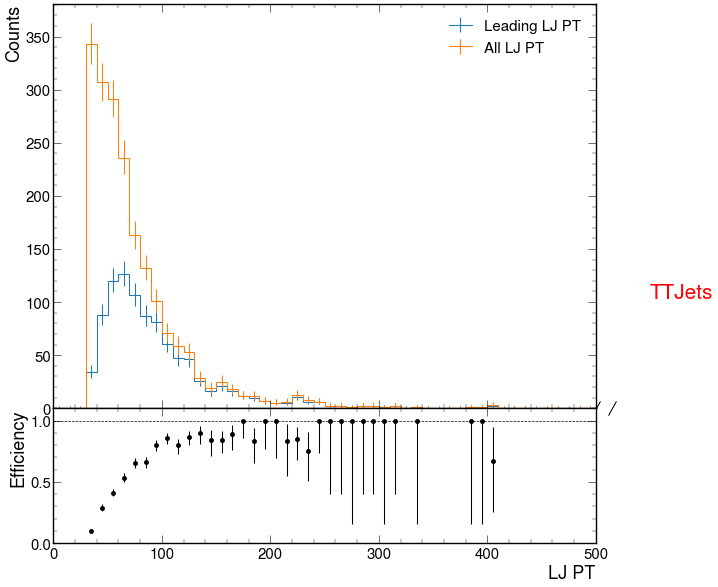

In [12]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["lj0_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Leading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

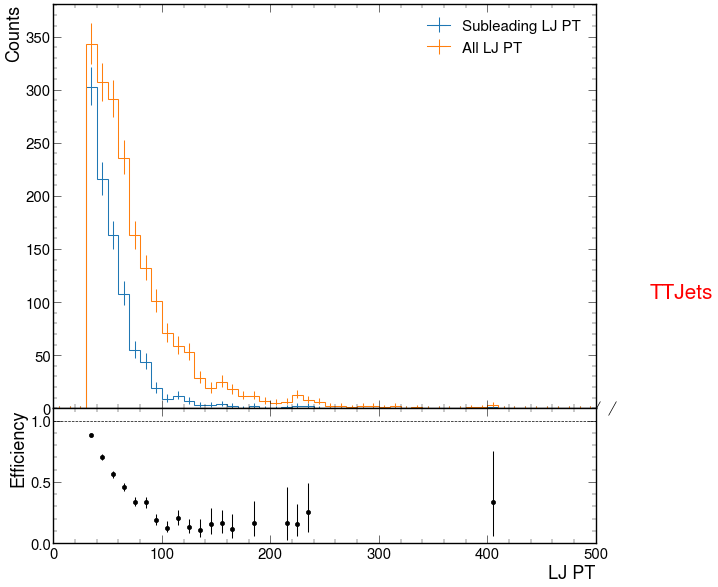

In [13]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["lj1_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Subleading LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

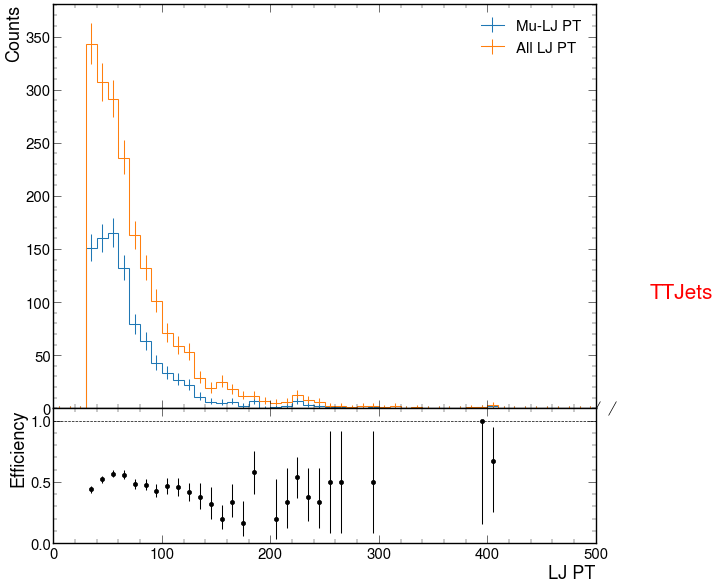

In [6]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["mu_lj_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="Mu-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

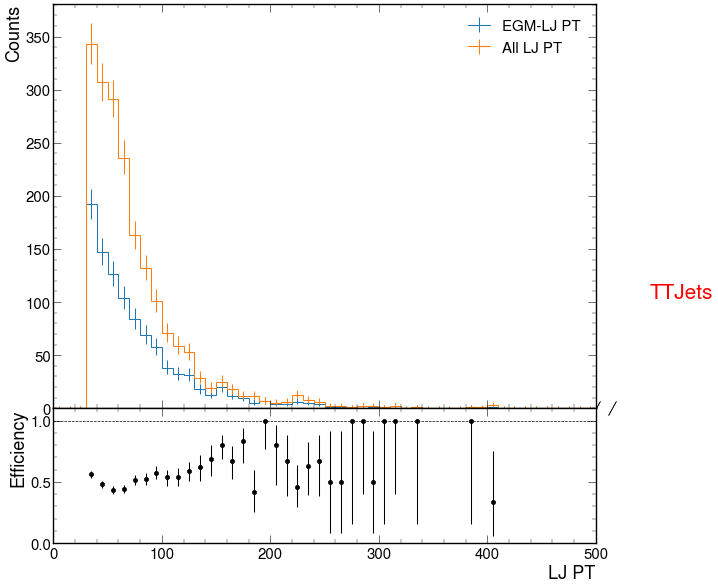

In [14]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["egm_lj_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="EGM-LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

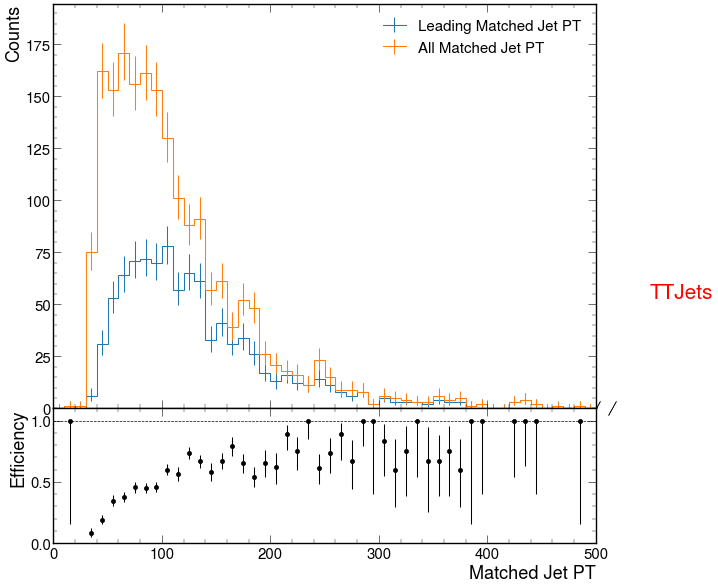

In [15]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["leading_matched_jets_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="Leading Matched Jet PT",
       rp_denom_label="All Matched Jet PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

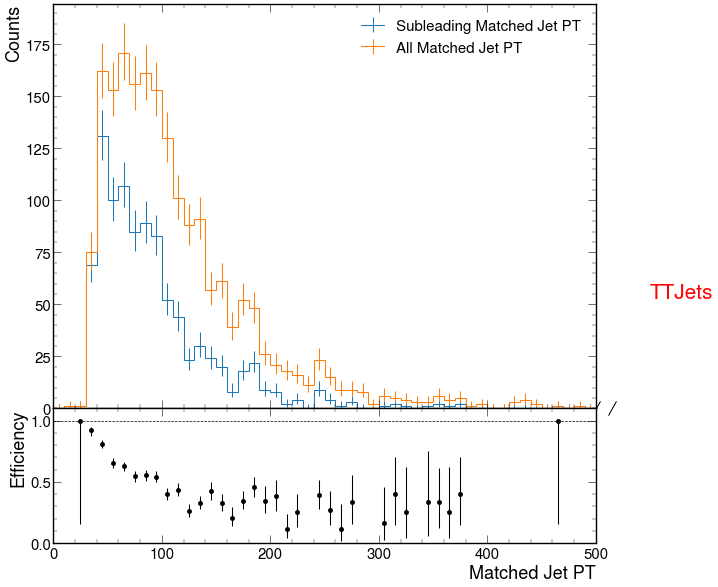

In [16]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["subleading_matched_jets_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="Subleading Matched Jet PT",
       rp_denom_label="All Matched Jet PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

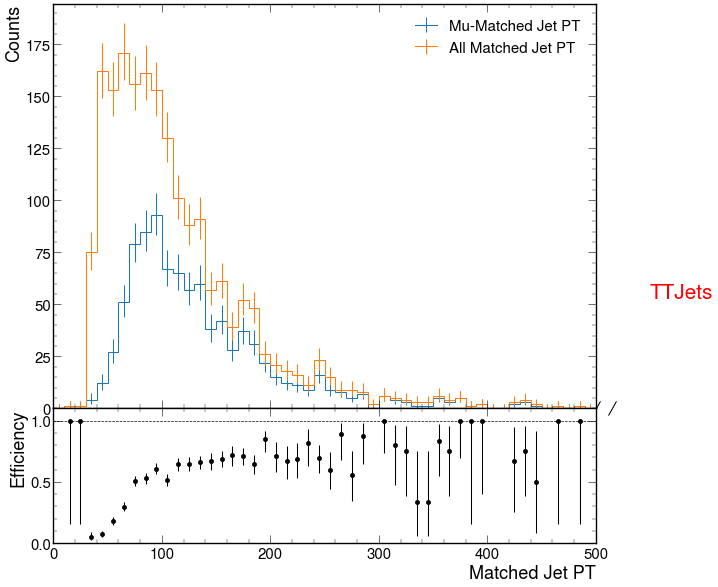

In [17]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["mu_matched_jets_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="Mu-Matched Jet PT",
       rp_denom_label="All Matched Jet PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

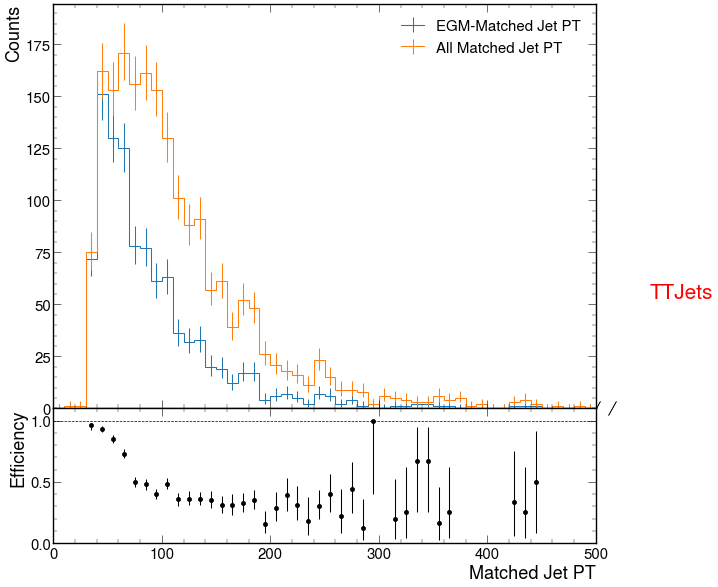

In [51]:
plt.figure(figsize=(14, 14))
out_bkg["TTJets"]["hists"]["all_egm_matched_jets_pt"][channels[0], :].plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="EGM-Matched Jet PT",
       rp_denom_label="All Matched Jet PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

In [28]:
import hist.intervals

In [38]:
def merge(h1, h2):
    histo = hist.Hist(*h1.axes)
    histo.values()[:] = (h1.values() + h2.values())
    
    return histo

In [54]:
lead_sub_lj = merge(out_bkg["TTJets"]["hists"]["lj0_pt"][channels[0], :], out_bkg["TTJets"]["hists"]["lj1_pt"][channels[0], :])
mu_egm_lj = merge(out_bkg["TTJets"]["hists"]["mu_lj_pt"][channels[0], :], out_bkg["TTJets"]["hists"]["egm_lj_pt"][channels[0], :])

lead_sub_mj = merge(out_bkg["TTJets"]["hists"]["leading_matched_jets_pt"][channels[0], :], out_bkg["TTJets"]["hists"]["subleading_matched_jets_pt"][channels[0], :])
mu_egm_mj = merge(out_bkg["TTJets"]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], out_bkg["TTJets"]["hists"]["egm_matched_jets_pt"][channels[0], :])

Text(550, 2, 'TTJets')

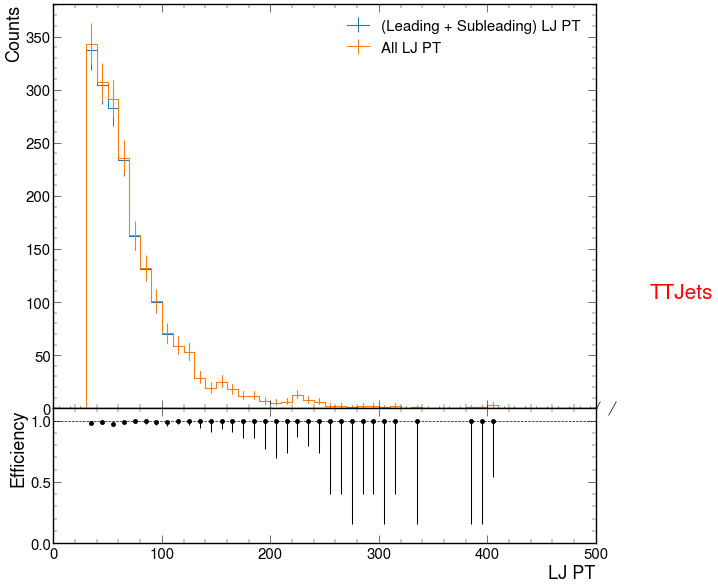

In [47]:
plt.figure(figsize=(14, 14))
lead_sub.plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="(Leading + Subleading) LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

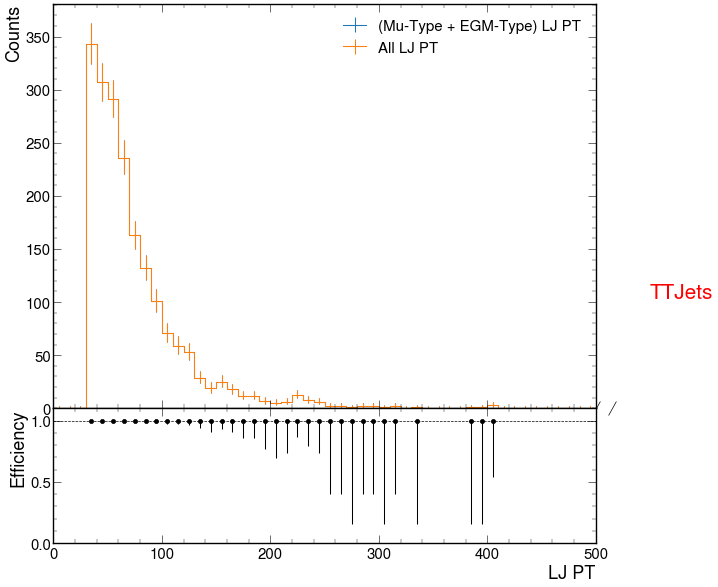

In [48]:
plt.figure(figsize=(14, 14))
mu_egm_lj.plot_ratio(
       out_bkg["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="(Mu-Type + EGM-Type) LJ PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(550, 2, 'TTJets')

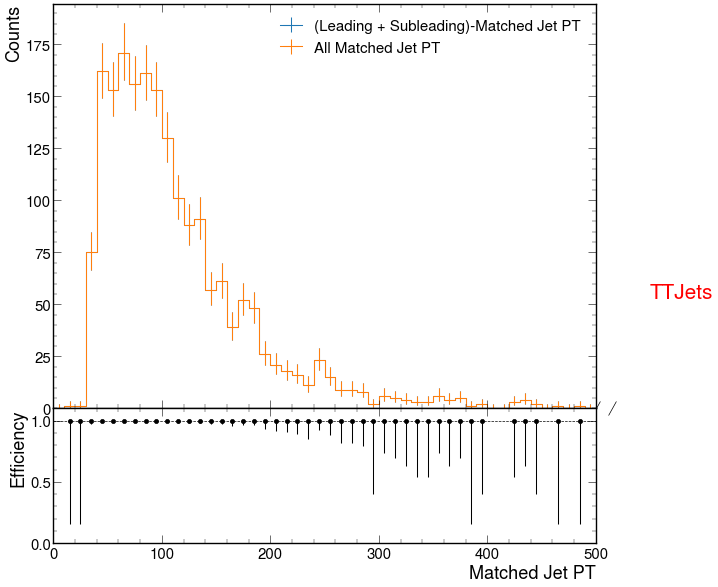

In [52]:
plt.figure(figsize=(14, 14))
lead_sub_mj.plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="(Leading + Subleading)-Matched Jet PT",
       rp_denom_label="All Matched Jet PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

ValueError: Found numerator larger than denominator while calculating binomial uncertainty

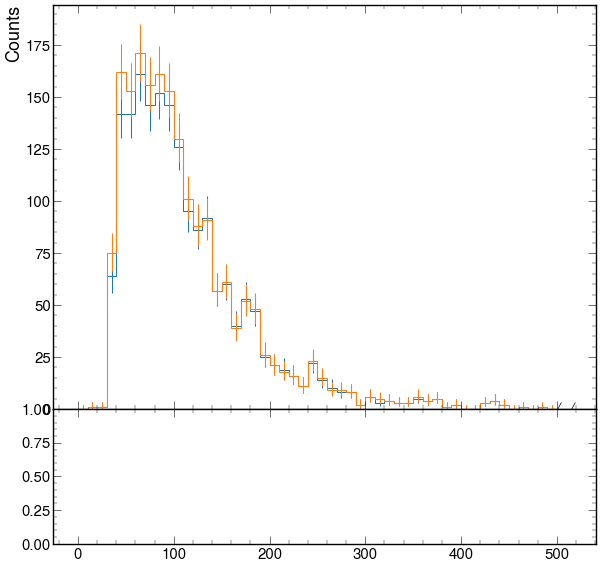

In [55]:
plt.figure(figsize=(14, 14))
mu_egm_mj.plot_ratio(
       out_bkg["TTJets"]["hists"]["matched_jets_pt"][channels[0],:], 
       rp_num_label="(Mu-Type + EGM-Type)-Matched Jet PT",
       rp_denom_label="All LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("Matched Jet PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')